# Automatic Detection of Hyperparameters for k-NN Models

Alexis Rosenfeld & François Delafontaine

## 1. Objective

This project explores the relationship between dataset characteristics and hyperparameter selection, particularly the best `k` for k-Nearest Neighbors (k-NN). 

For a given dataset `A` = {y, x1, x2, ..., xn} we derive a set of features `mx` = {mx1, mx2, ..., mxn} that describe A. Those features should predict the best `k` (number of neighbors) hyperparameter for A:

> $\pi$(mx) = k.

We limit ourselves to the k-NN's one hyperparameter and also limit the type of dataset `A` in size, complexity, distribution, etc., notably by only allowing quantitative features. The dataset used to train our model will be called `D` = {best_k, mx}.

## 1. Data & features

We recognize, for this project, three types of data:
1. Real: datasets found online
2. Simulated: datasets where `k` is generated first, then `mx` derived through formulas.
3. Tested: datasets where `mx` is generated first and `k` obtained through k-NN iteration.

This presentation will rely solely on (3), as the data generated can also be used to train, test and evaluate our model. We plan to use (2) to test model's behavior and eventually (1) as a more general evaluation.

As for the features, we followed the following leads:
- A rule of thumb where k = sqrt(nb_of_datapoints)/2.
- The level of noise, which here will mean how much the datapoints overlap.
- Potentially the type of distribution (linear, quadratic, etc.).

We therefore selected the following `mx` features:
a. n_rows: the number of `A`'s datapoints
b. n_classes: with `A` having a categorical dependent variable, this is its number of values
c. n_features: the number of `A`'s features
d. n_nonrand: the number of `A`'s features that are non-random (defined by correlation, weighted by (c))
e. distr_type: the type of distribution the non-random features follow (linear, quadratic, partial)
f. distr_noise: how likely the values are to overlap (how wide the interval for data generation)
g. mean_var: the average sum of variance of `A`'s features, weighted by (a\*c)
h. mean_skew: the average sum of skew of `A`'s features, weighted by (a\*c)
i. mean_kurtosis: the average sum of kurtosis of `A`'s features, weighted by (a\*c)

And generated a ~4,000 datapoints `D` dataset. The code below illustrates what an `A` dataset looks like, as well as the relations between `best_k` and each of our 9 features.

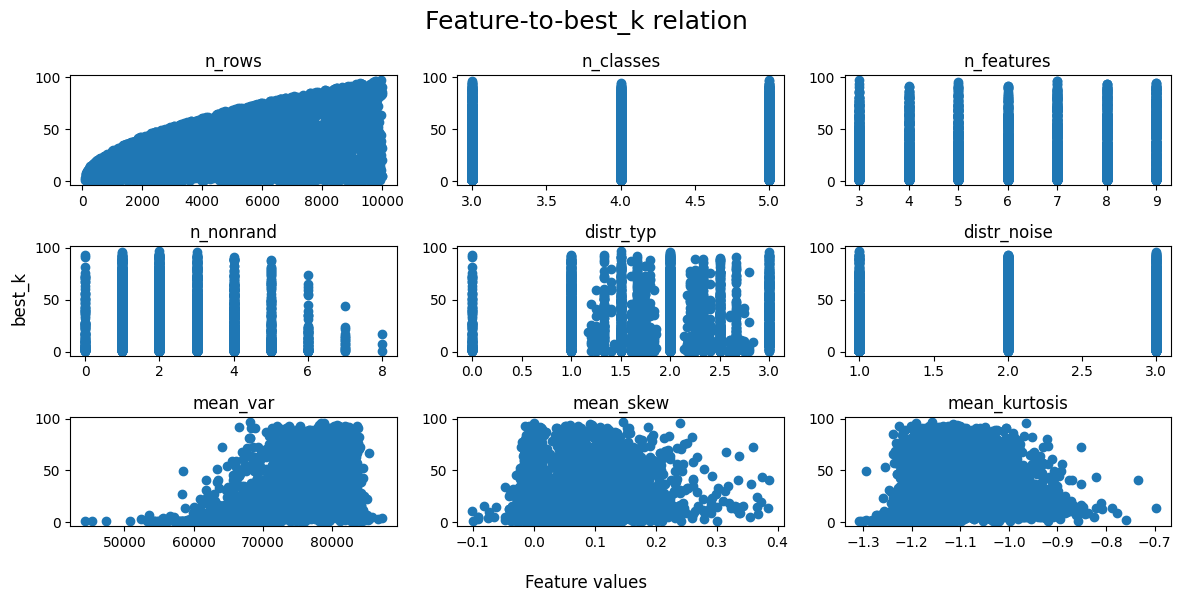

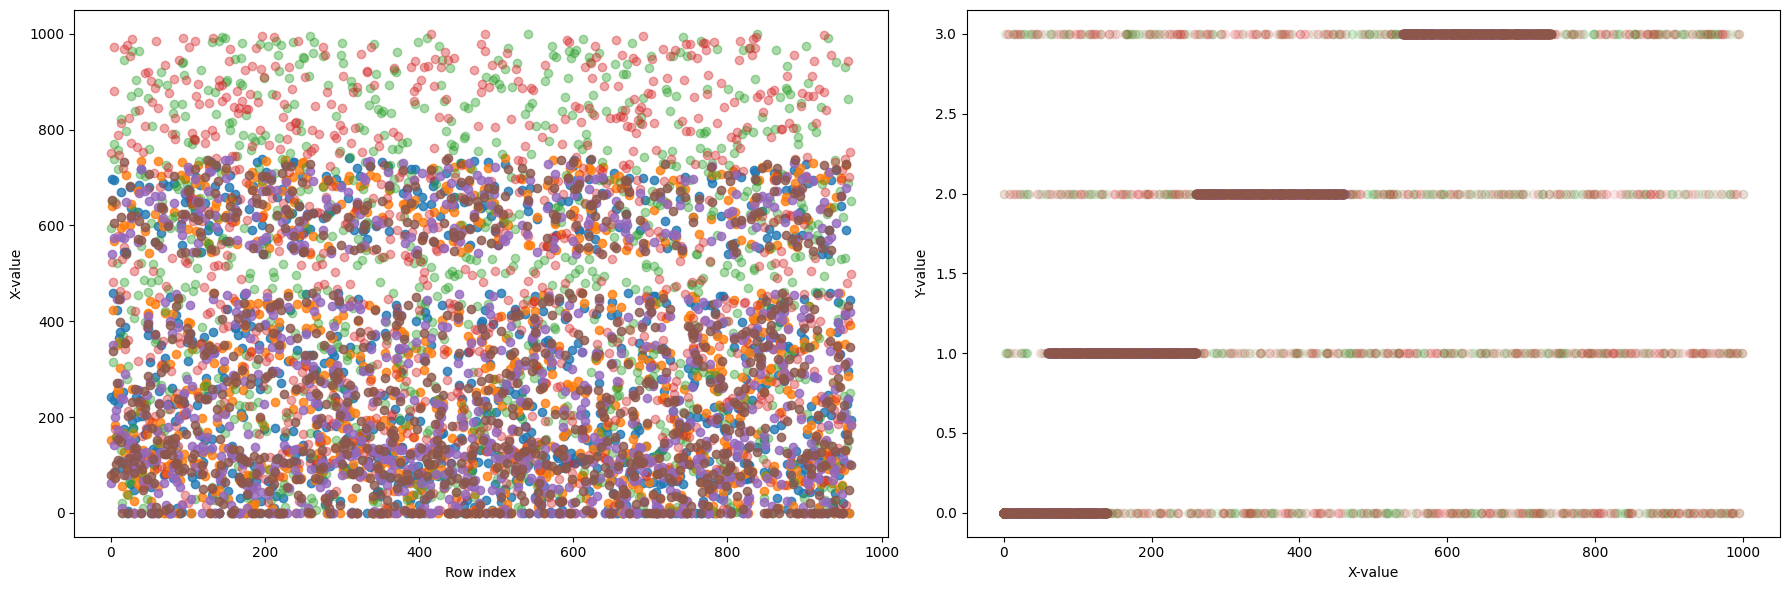

n_rows: 960
n_classes: 4
n_features: 6
n_nonrand: 4
distr_typ: 2.0
distr_noise: 1
mean_var: 63857.62378128618
mean_skew: 0.33237810117533867
mean_kurtosis: -1.1352507679295962


In [11]:
from kg_test import KG_test
kg_test = KG_test() # testing class

## data generation
# dat = kg_test.sim(2000, "kg_test.xlsx", verbose=True)
dat = kg_test.load("kg_test.xlsx") # load an existing dataset

## best_k-to-feature scatterplots
kg_test.show_features(dat)
## illustrating a single dataset
kg_test.params({'lim_row':[500,1000], 
                'distr_type':2, 
                'distr_noise':1})        # control generation (limited)
x, y, d_vi = kg_test.generate(view=True) # generate a new dataset
vf = [f"{kg_test.head[i+1]}: {v}" for i, v 
      in enumerate(kg_test.get_features(x, y, d_vi))] # generation values
for txt in vf:
    print(txt)

## 2. Pipeline

### 2.1. Pre-process

### 2.2. Model

## 3. Results